/opt/anaconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-10-03 20:55:13.067483: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-10-03 20:55:13.067550: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-10-03 20:55:13.067566: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-10-03 20:55:13.067983: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-03 20:55:13.068087: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:

Epoch 1/5


2024-10-03 20:55:14.817804: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - loss: 1.7697 - sparse_categorical_accuracy: 0.3506 - val_loss: 1.2706 - val_sparse_categorical_accuracy: 0.5466
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 1.1666 - sparse_categorical_accuracy: 0.5881 - val_loss: 1.0713 - val_sparse_categorical_accuracy: 0.6177
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.9587 - sparse_categorical_accuracy: 0.6658 - val_loss: 0.9321 - val_sparse_categorical_accuracy: 0.6752
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.8204 - sparse_categorical_accuracy: 0.7130 - val_loss: 0.8927 - val_sparse_categorical_accuracy: 0.6914
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.7329 - sparse_categorical_accuracy: 0.7443 - val_loss: 0.8558 - val_sparse_categorical_accuracy: 0.7073
313/313 - 1s - 3ms/step - loss: 0.8669 - sparse_categorical_accuracy: 0.7051


Test accuracy: 0.7050999999046326


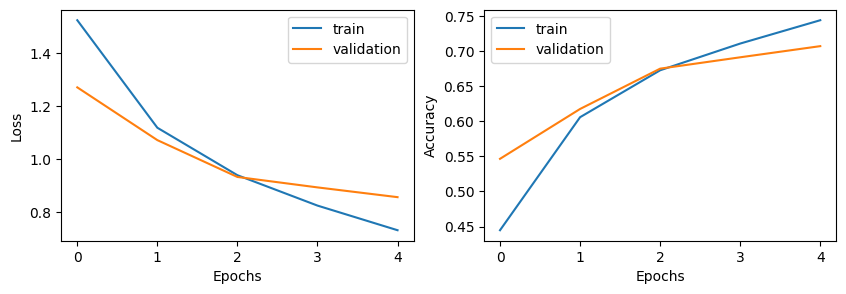

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


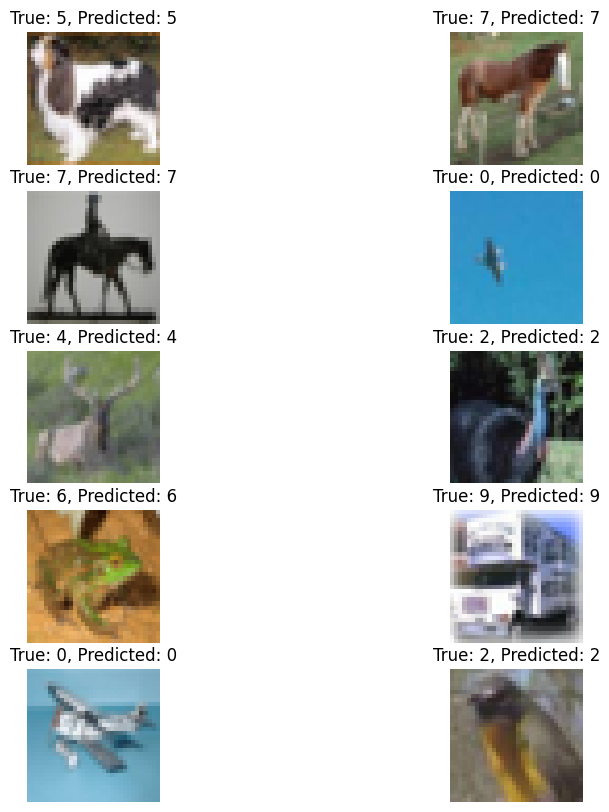

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix
[[793  24  60   9  11   5   8   9  46  35]
 [ 19 856   6   2   1   4   8   3  18  83]
 [ 77   9 609  31  45  59  78  54  22  16]
 [ 34  13 100 436  50 160  96  52  25  34]
 [ 41   5 126  62 502  39  95 111  13   6]
 [ 19   6  64 120  32 607  37  71  25  19]
 [  5   7  54  46   9  11 827  11  14  16]
 [ 21   3  48  13  32  40  12 803   6  22]
 [ 91  43  18   8   5   2   4   6 797  26]
 [ 30  79   4   8   0   6   8  17  27 821]]


In [1]:
%matplotlib inline
import numpy as np
import pickle
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Function to load CIFAR-10 data batches
def load_cifar10_data(file_paths):
    X, y = [], []
    for file_path in file_paths:
        with open(file_path, 'rb') as f:
            batch = pickle.load(f, encoding='bytes')
            X.append(batch[b'data'])
            y += batch[b'labels']
    X = np.vstack(X).reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
    X = X.astype('float32') / 255.0  # Normalize pixel values
    y = np.array(y)
    return X, y

# Function to load test batch
def load_test_batch(test_file_path):
    with open(test_file_path, 'rb') as f:
        batch = pickle.load(f, encoding='bytes')
        X_test = batch[b'data'].reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1).astype('float32') / 255.0
        y_test = np.array(batch[b'labels'])
    return X_test, y_test

# Paths to training and test batches
train_file_paths = [
    'data_batch_1',
    'data_batch_2',
    'data_batch_3',
    'data_batch_4',
    'data_batch_5'
]
test_file_path = 'test_batch'

# Load training and test data
X_train, y_train = load_cifar10_data(train_file_paths)
X_test, y_test = load_test_batch(test_file_path)

# Build the CNN model
model = tf.keras.Sequential([
    # First Conv layer with MaxPool
    tf.keras.layers.Conv2D(16, kernel_size=(3,3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(16, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    # Second Conv layer with MaxPool
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    # Flatten and Dense layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=64, epochs=5, validation_split=0.2)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

# Save the model
model.save('CIFAR10_CNN_weights.h5')

# Plot the training and validation loss
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(122)
plt.plot(history.history['sparse_categorical_accuracy'], label='train')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Predict and visualize some test samples
plt.figure(figsize=(10,10))
for i in range(10):
    index = np.random.randint(0, len(X_test))
    plt.subplot(5, 2, i+1)
    plt.imshow(X_test[index])
    pred_label = np.argmax(model.predict(X_test[index:index+1]))
    true_label = y_test[index]
    plt.title(f'True: {true_label}, Predicted: {pred_label}')
    plt.axis('off')
plt.show()

# Confusion matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(conf_mat)
